<a href="https://colab.research.google.com/github/akhils-codes1/ML4Crypto-2022/blob/main/rechecked_jan4_ciphertexts_to_png.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from imageio import imread
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('allrounds.csv')
df.describe()

Unnamed: 0         class
count  66000.00000  66000.000000
mean   32999.50000      5.000000
std    19052.70322      3.162302
min        0.00000      0.000000
25%    16499.75000      2.000000
50%    32999.50000      5.000000
75%    49499.25000      8.000000
max    65999.00000     10.000000

In [ ]:
a = df.iloc[0]['text']
a

'1f7ce7812cb9d38a0eea83ff99a4f02aba7f3e47462d6c602eb8eb71533848ec258645c18c8410c2eb72b9ae8517069bf0e46eddf7fc6008036f2cf31c27b1fcb0509fa63bf66292f2e63435892927242a195689a9b8d11a291ed96d1b334b5c12c02ed5b774683f6db7ab06d5d11eb176aa9242671f5478b36522ade708b9e8d70094e6be87fcf31019a95b42387af11afeaf458ea4c9e09d58841edc8afb626f50d9c2a0832cba68a9c14e07e215b9a7b8512e6babe2f77ae2a73d3d23dbfa4b56d938e521d990852a21a5a6b964cd77dec2d09f8e9fd79265a5db83d05025bcd44f69f8b688b9c6c2ebd0706cc2bca32845265c7aa900c73d9c8873f59c38a19882888be098651a24b2ba8dc2673599bda8498f4c5194417b02efefb04a2fa23364cb334bbbd43a6f7e611cafa5c853a5918dec8a755328cecd87aae98428972eaf46b9d2dc9328a15c145033620be220d619f1c44f178ea6b196350887e6610cc497f3e592797d79e758011bd575c0b9884e15b03dfe5a1e82eb31977c1f3bd7485564fce35afbca68be18874c6b648b8e0be061b719ef219d5c14488c14d56b6187fea595c472adb26fc7447b165b2ad4509074e8710a550e3a6d5c659110f8170b319994d3d9af26001c8ee3d39c2c33fcfca4b3a37d3ebfa43d9fe5047de4c809009886cf498d3146cb3c0e53b773cce

In [ ]:
s = []
for i in a:
    s.append(str(ord(i)))
for i in range(25):
    s.append('254')
s = " ".join(s)
s = s+" "

In [ ]:
s

'49 102 55 99 101 55 56 49 50 99 98 57 100 51 56 97 48 101 101 97 56 51 102 102 57 57 97 52 102 48 50 97 98 97 55 102 51 101 52 55 52 54 50 100 54 99 54 48 50 101 98 56 101 98 55 49 53 51 51 56 52 56 101 99 50 53 56 54 52 53 99 49 56 99 56 52 49 48 99 50 101 98 55 50 98 57 97 101 56 53 49 55 48 54 57 98 102 48 101 52 54 101 100 100 102 55 102 99 54 48 48 56 48 51 54 102 50 99 102 51 49 99 50 55 98 49 102 99 98 48 53 48 57 102 97 54 51 98 102 54 54 50 57 50 102 50 101 54 51 52 51 53 56 57 50 57 50 55 50 52 50 97 49 57 53 54 56 57 97 57 98 56 100 49 49 97 50 57 49 101 100 57 54 100 49 98 51 51 52 98 53 99 49 50 99 48 50 101 100 53 98 55 55 52 54 56 51 102 54 100 98 55 97 98 48 54 100 53 100 49 49 101 98 49 55 54 97 97 57 50 52 50 54 55 49 102 53 52 55 56 98 51 54 53 50 50 97 100 101 55 48 56 98 57 101 56 100 55 48 48 57 52 101 54 98 101 56 55 102 99 102 51 49 48 49 57 97 57 53 98 52 50 51 56 55 97 102 49 49 97 102 101 97 102 52 53 56 101 97 52 99 57 101 48 57 100 53 56 56 52 49 101 100 9

In [ ]:
f = open("new.pnm","w")
f.write("P2 45 45 254\n")
f.write(s)
f.close()

In [ ]:
import os

In [ ]:
os.system("pnmtopng -compression 0 new.pnm > new.png")

pnmtopng: 16 colors found


0

In [ ]:
img = imread("new.png")

/tmp/ipykernel_4826/1985934730.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imread("new.png")


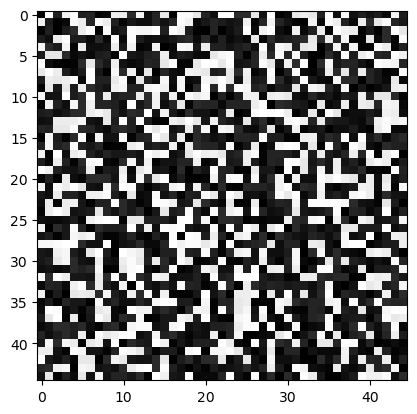

In [ ]:
plt.figure()
plt.imshow(img,cmap='gray')

In [ ]:
ldf = len(df)
ldf

66000

In [ ]:
import numpy as np
import os

In [ ]:
path = !pwd
path = path[0]
path

'/home/d/cip2'

In [ ]:
class_count = np.zeros(11)
for i in range(ldf):
    txt = df.iloc[i]['text']
    clabel = df.iloc[i]['class']
    s = []
    for i in txt:
        s.append(str(ord(i)))
    for i in range(25):
        s.append('255')
    s = " ".join(s)
    s = s+" "
    class_count[int(clabel)]+=1
    fname = str(clabel)+"_"+str(int(class_count[int(clabel)]))+".pgm"
    f = open(path+'/allrounds_pgm/'+fname,"w")
    f.write("P2 45 45 255\n")
    f.write(s)
    f.close()
    os.system("pnmtopng -compression 0 "+path+'/allrounds_pgm/'+fname+" > "+path+'/allrounds_png/'+fname[:-3]+"png")

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16 colors found
pnmtopng: 16

In [ ]:
import random

In [ ]:
temp = [random.randint(1,200) for i in range(10)]

In [ ]:
%cd ..

/home/d/cip2


In [ ]:
for i in range(11):
    for j in temp:
        os.system("cp ./allrounds_png/"+str(i)+"_"+str(j)+".png b")

In [ ]:
temp

[34, 163, 149, 139, 190, 82, 189, 144, 196, 86]

In [ ]:
%cd b

/home/d/cip2/b


In [ ]:
l = os.listdir(os.curdir)

In [ ]:
imgd = {}
for i in l:
    imgd[i] = imread(i)

/tmp/ipykernel_4826/3998718285.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imgd[i] = imread(i)


In [ ]:
imgs = {}

In [ ]:
for i in temp:
    imgs[i] = []

In [ ]:
for i in range(11):
    for j in temp:
        imgs[j].append(imgd[str(i)+"_"+str(j)+".png"])

In [ ]:
# # _, axs = plt.subplots(n_row, n_col, figsize=(12, 12))
# _, axs = plt.subplots(len(temp), 11, figsize=(45, 45))
# axs = axs.flatten()
# for img, ax in zip(imgs, axs):
#     ax.imshow(img)
# plt.show()


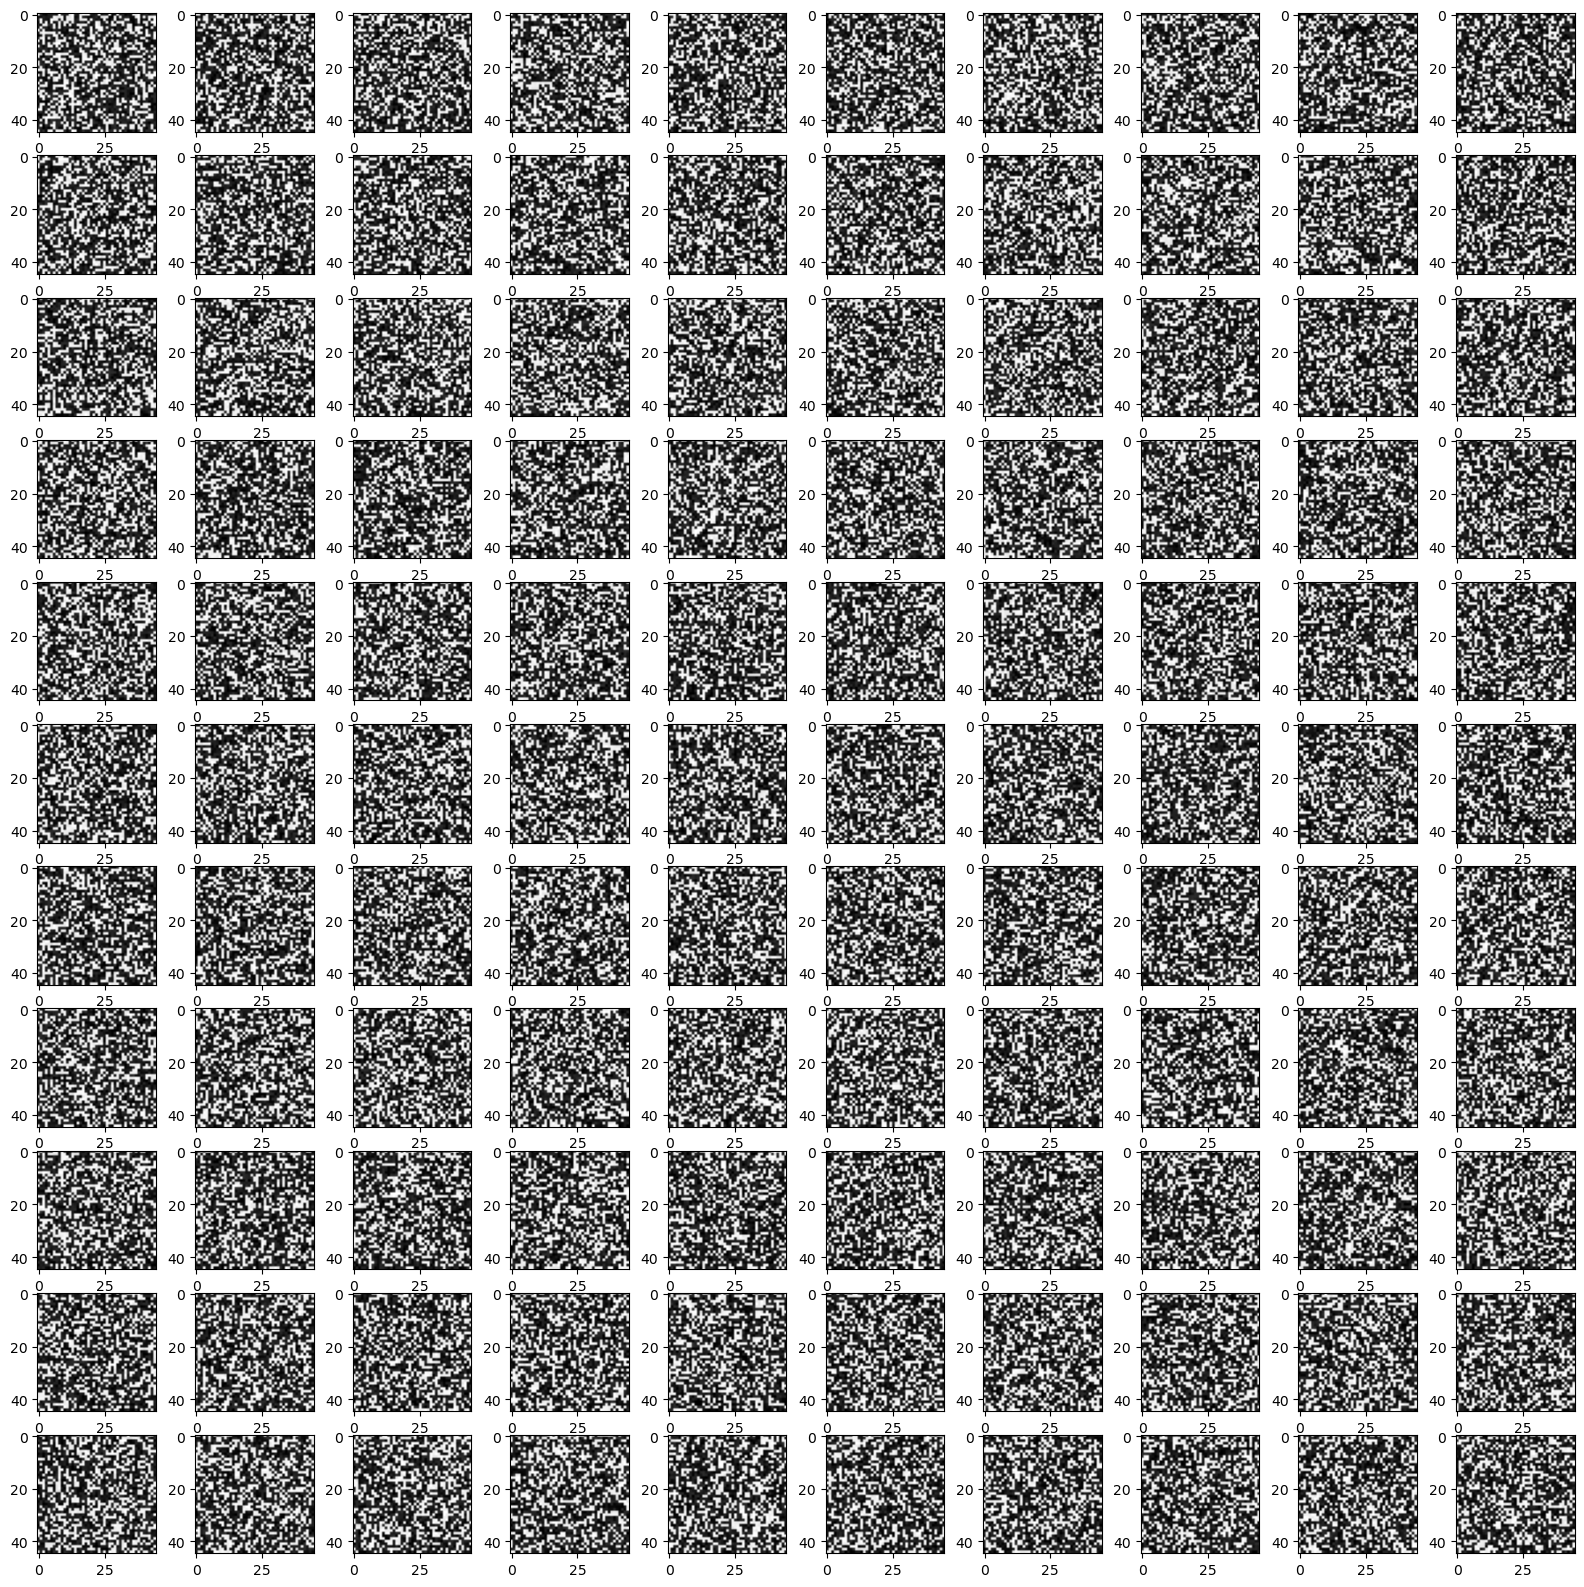

In [ ]:
count=1
fig = plt.figure(figsize=(20,20))
for i in range(11):
    for j in temp:
        fig.add_subplot(11,10,count).imshow(imgd[str(i)+"_"+str(j)+".png"],cmap='gray')
        count+=1

In [ ]:
#column corresponds to a particular ciphertext
#rows correspond to different rounds